In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [72]:

flower_data = pd.read_csv("C:\Users\PENGUIN\Desktop\CODSOFT\CODSOFT\Task3-Iris Flower Classification\IRIS.csv")


In [73]:

flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:

flower_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:

flower_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:

species_counts = flower_data['species'].value_counts()
species_counts

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [77]:

tmp_data = flower_data.drop('sepal_length', axis=1)

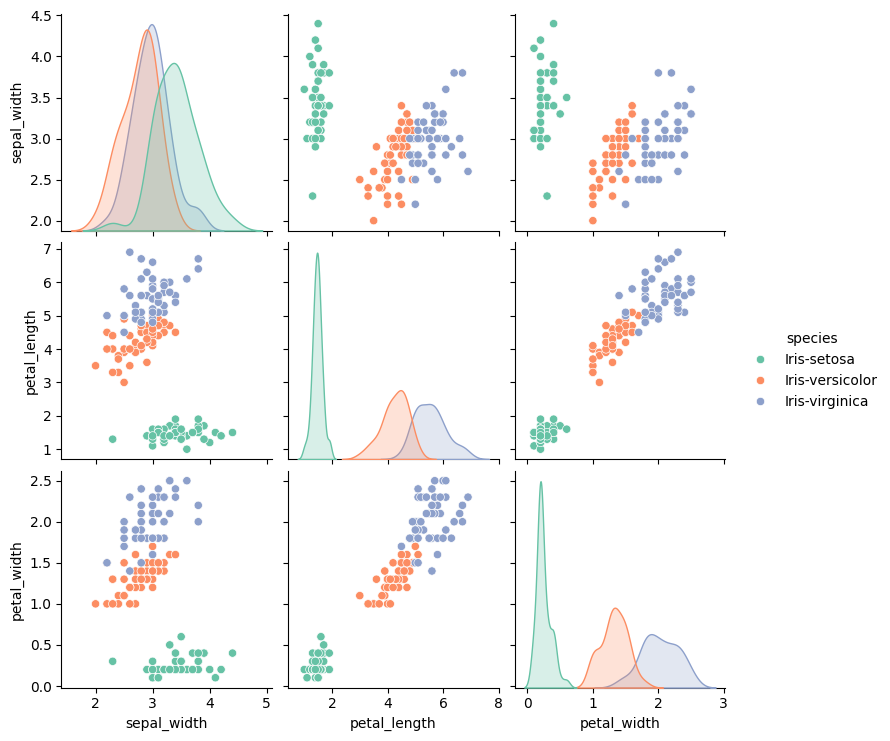

In [78]:

pair_plot = sns.pairplot(tmp_data, hue='species', markers='o')
plt.show()

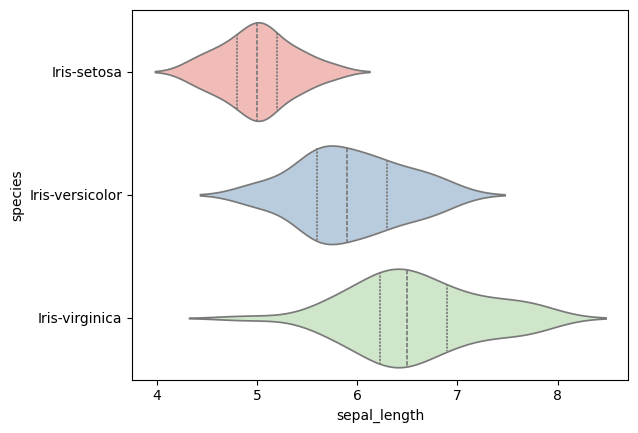

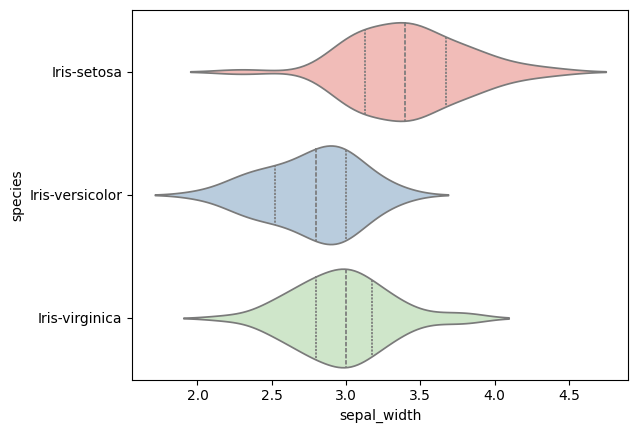

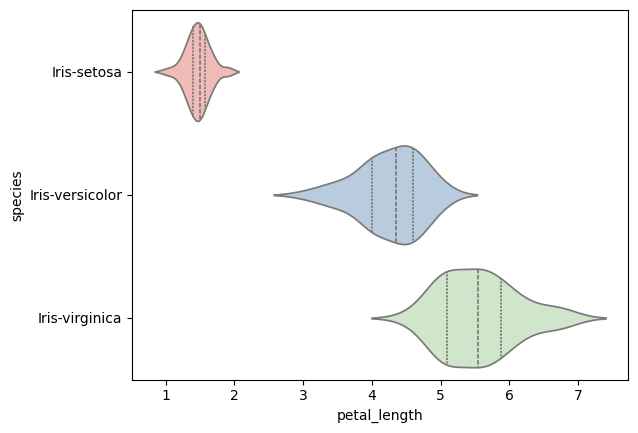

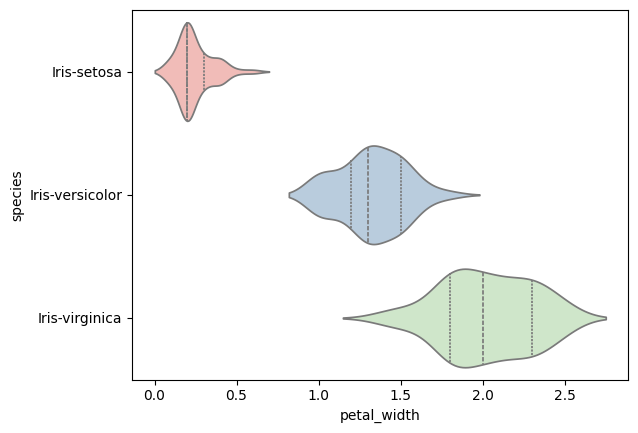

In [65]:

violin_plot1 = sns.violinplot(x='sepal_length', y='species', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()
violin_plot2 = sns.violinplot(y='species', x='sepal_width', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

violin_plot3 = sns.violinplot(y='species', x='petal_length', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

violin_plot4 = sns.violinplot(y='species', x='petal_width', data=flower_data, inner='quartile', hue='species', palette='Pastel1')
plt.show()

In [48]:

X_flowers = flower_data.drop(['sepal_length', 'species'], axis=1)
y_flowers = flower_data['species']


In [49]:

k_values = list(range(1, 26))
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_flowers, y_flowers)
    y_pred_knn = knn_model.predict(X_flowers)
    accuracy_scores.append(metrics.accuracy_score(y_flowers, y_pred_knn))


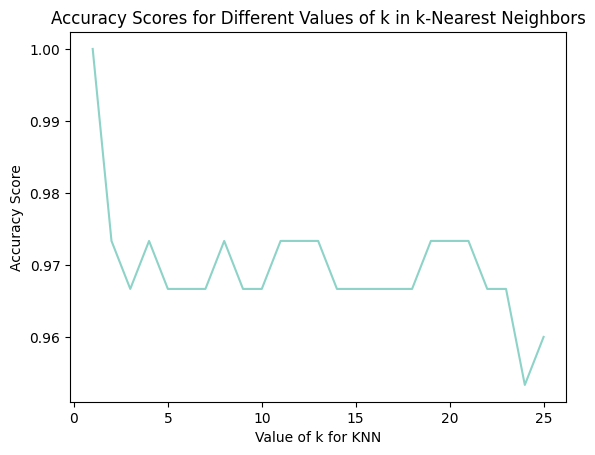

In [66]:

plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of k in k-Nearest Neighbors')
plt.show()

In [51]:

logreg_model = LogisticRegression()
logreg_model.fit(X_flowers, y_flowers)
y_pred_logreg = logreg_model.predict(X_flowers)
logreg_accuracy = metrics.accuracy_score(y_flowers, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')

Logistic Regression Accuracy: 0.9800


In [52]:

X_train_flowers, X_test_flowers, y_train_flowers, y_test_flowers = train_test_split(
    X_flowers, y_flowers, test_size=0.4, random_state=5
)

In [53]:

knn_model_test = KNeighborsClassifier(n_neighbors=12)
knn_model_test.fit(X_train_flowers, y_train_flowers)
y_pred_knn_test = knn_model_test.predict(X_test_flowers)
knn_accuracy_test = metrics.accuracy_score(y_test_flowers, y_pred_knn_test)

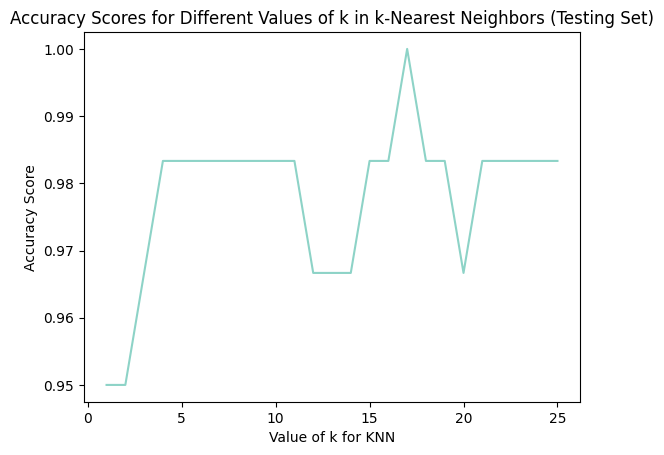

In [67]:

k_values_test = list(range(1, 26))
accuracy_scores_test = []

for k in k_values_test:
    knn_model_test_k = KNeighborsClassifier(n_neighbors=k)
    knn_model_test_k.fit(X_train_flowers, y_train_flowers)
    y_pred_knn_test_k = knn_model_test_k.predict(X_test_flowers)
    accuracy_scores_test.append(metrics.accuracy_score(y_test_flowers, y_pred_knn_test_k))

plt.plot(k_values_test, accuracy_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Values of k in k-Nearest Neighbors (Testing Set)')
plt.show()

In [55]:

logreg_model_test = LogisticRegression()
logreg_model_test.fit(X_train_flowers, y_train_flowers)
y_pred_logreg_test = logreg_model_test.predict(X_test_flowers)
logreg_accuracy_test = metrics.accuracy_score(y_test_flowers, y_pred_logreg_test)
print(f'Logistic Regression Accuracy on Testing Set: {logreg_accuracy_test:.4f}')


Logistic Regression Accuracy on Testing Set: 0.9833


In [79]:

new_flower_data = np.array([[6, 3, 4, 2]])


new_flower_data_subset = new_flower_data[:, :3]


if new_flower_data_subset.shape[1] != X_train_flowers.shape[1]:
    raise ValueError(f"Number of features in the prediction data ({new_flower_data_subset.shape[1]}) "
                     f"does not match the number of features used for training ({X_train_flowers.shape[1]})")


In [61]:
# Create a DataFrame with the correct column names
new_flower_data_df = pd.DataFrame(new_flower_data, columns=flower_data.columns[:-1])
